# **CUSTOMER SEGMENTATION**



### **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
X=df[['Annual Income (k$)','Spending Score (1-100)']]

In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

### **Elbow Method**

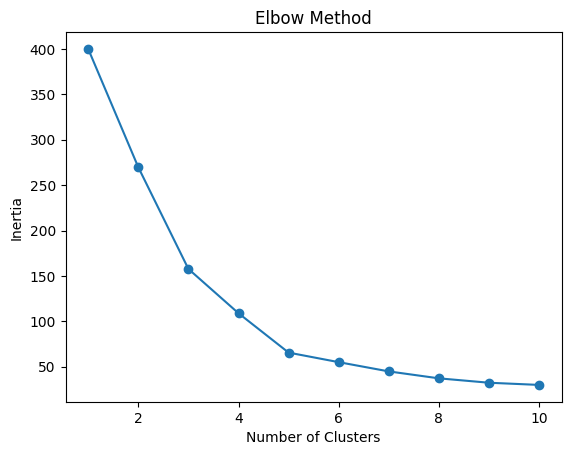

In [ ]:
inertia=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42,n_init=10)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

plt.plot(range(1,11),inertia,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

### **KMeans**



In [ ]:
kmeans=KMeans(n_clusters=5,random_state=42,n_init=10)
df['Clusters']=kmeans.fit_predict(X_scaled)

In [ ]:
cluster_ranges = df.groupby('Clusters')[['Annual Income (k$)', 'Spending Score (1-100)']].agg(['min','max'])
print(cluster_ranges)

         Annual Income (k$)      Spending Score (1-100)    
                        min  max                    min max
Clusters                                                   
0                        39   76                     34  61
1                        69  137                     63  97
2                        15   39                     61  99
3                        70  137                      1  39
4                        15   39                      3  40


In [ ]:
# Give clusters human-friendly names
labels_map = {
    0: "Average Income - Average Spending",
    1: "High Income - High Spending",
    2: "Low Income - High Spending",
    3: "High Income - Low Spending",
    4: "Low Income - Low Spending"
}

df['Cluster_Label'] = df['Clusters'].map(labels_map)

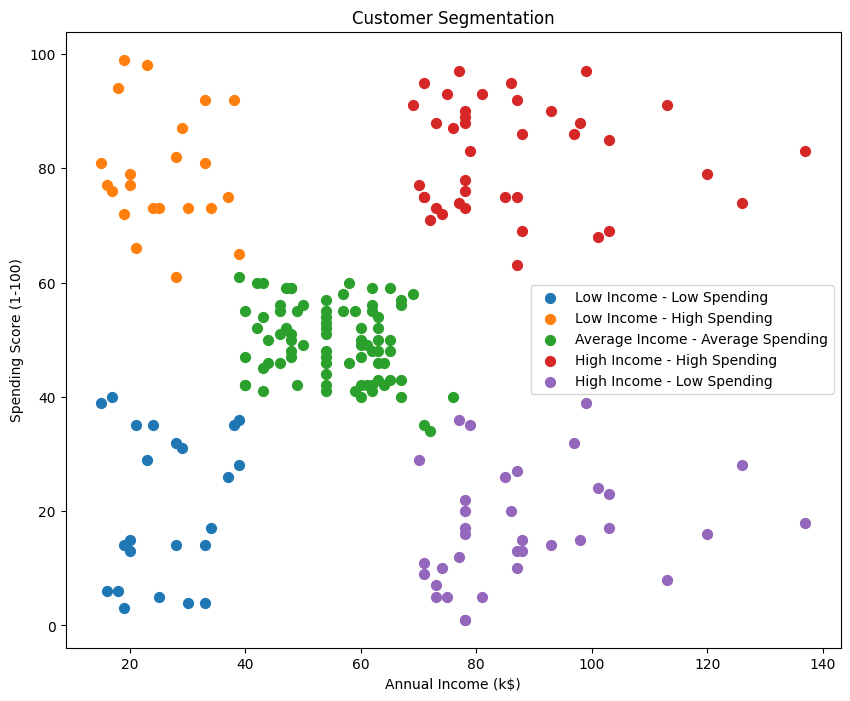

In [ ]:
plt.figure(figsize=(10,8))
for cluster in df['Clusters'].unique():
    cluster_data = df[df['Clusters'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=labels_map[cluster], s=50, cmap = 'rainbow')

plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### **DBSCAN CLUSTERING**

Cluster counts (DBSCAN):
DBSCAN_Cluster
 0    157
 1     35
-1      8
Name: count, dtype: int64


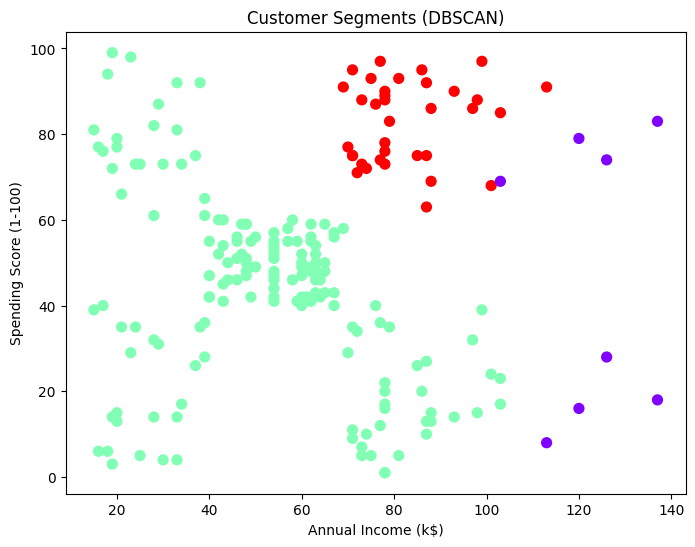

In [ ]:

# Apply DBSCAN on scaled data
dbscan = DBSCAN(eps=0.5, min_samples=5)   # tune eps if needed
db_labels = dbscan.fit_predict(X_scaled)

# Add DBSCAN cluster labels to DataFrame
df['DBSCAN_Cluster'] = db_labels

# Show cluster counts
print("Cluster counts (DBSCAN):")
print(df['DBSCAN_Cluster'].value_counts())

# Visualize DBSCAN clusters
plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['DBSCAN_Cluster'], cmap='rainbow', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments (DBSCAN)')
plt.show()

In [ ]:
# Average spending per cluster (KMeans)
avg_spending_kmeans = df.groupby('Clusters')['Spending Score (1-100)'].mean()
print("Average Spending per Cluster (KMeans):\n", avg_spending_kmeans)

# Average spending per cluster (DBSCAN) -- ignore noise (-1)
avg_spending_dbscan = df[df['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster')['Spending Score (1-100)'].mean()
print("\nAverage Spending per Cluster (DBSCAN):\n", avg_spending_dbscan)


Average Spending per Cluster (KMeans):
 Clusters
0    49.518519
1    82.128205
2    79.363636
3    17.114286
4    20.913043
Name: Spending Score (1-100), dtype: float64

Average Spending per Cluster (DBSCAN):
 DBSCAN_Cluster
0    43.101911
1    82.800000
Name: Spending Score (1-100), dtype: float64
